In [ ]:
!pip install --upgrade --no-cache-dir torch==2.0.1 torchvision==0.15.2 transformers==4.30.2 datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 201.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 194.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 196.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 183.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 218.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 231.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 170.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 120.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 182.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 174.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 128.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

#### Dataset Overview

Table 1. GoEmotions Dataset Overview

Description: A table summarizing the number of samples in the training, validation, test sets, along with the total number of emotion classes.

In [ ]:
from datasets import load_dataset
from tabulate import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from transformers import AutoTokenizer

dataset = load_dataset("go_emotions")

def summarize_dataset_splits(dataset):
    train_size = len(dataset["train"])
    validation_size = len(dataset["validation"])
    test_size = len(dataset["test"])
    return {"Train Samples": train_size, "Validation Samples": validation_size, "Test Samples": test_size}

split_summary = summarize_dataset_splits(dataset)

def tabulate_dataset_splits(split_summary):
    table = [
        ["Split", "Number of Samples"],
        ["Train", split_summary["Train Samples"]],
        ["Validation", split_summary["Validation Samples"]],
        ["Test", split_summary["Test Samples"]],
    ]
    print(tabulate(table, headers="firstrow", tablefmt="grid"))

print("\nDataset Splits:")
tabulate_dataset_splits(split_summary)


Dataset Splits:
+------------+---------------------+
| Split      |   Number of Samples |
+============+=====================+
| Train      |               43410 |
+------------+---------------------+
| Validation |                5426 |
+------------+---------------------+
| Test       |                5427 |
+------------+---------------------+


In [ ]:
def summarize_dataset_classes(dataset):
    label_names = dataset["train"].features["labels"].feature.names
    num_classes = len(label_names)
    return {"Number of Unique Classes": num_classes, "Emotion Labels": label_names}

class_summary = summarize_dataset_classes(dataset)

def tabulate_dataset_classes(class_summary):
    num_classes_table = [
        ["Metric", "Value"],
        ["Number of Unique Classes", class_summary["Number of Unique Classes"]]
    ]
    print(tabulate(num_classes_table, headers="firstrow", tablefmt="grid"))

print("\nDataset Classes:")
tabulate_dataset_classes(class_summary)


Dataset Classes:
+--------------------------+---------+
| Metric                   |   Value |
+==========================+=========+
| Number of Unique Classes |      28 |
+--------------------------+---------+


In [ ]:
def compute_class_distribution_percentage(dataset, split_name):
    label_names = dataset[split_name].features["labels"].feature.names
    num_labels = len(label_names)

    label_counts = np.zeros(num_labels, dtype=int)
    for sample in dataset[split_name]:
        for label in sample["labels"]:
            label_counts[label] += 1

    total_samples = len(dataset[split_name])
    label_percentages = np.round((label_counts / total_samples) * 100, 1)

    return pd.DataFrame({"Label": label_names, "Percentage": label_percentages})

train_distribution_percentage = compute_class_distribution_percentage(dataset, "train")
validation_distribution_percentage = compute_class_distribution_percentage(dataset, "validation")
test_distribution_percentage = compute_class_distribution_percentage(dataset, "test")

combined_distribution = pd.DataFrame({
    "Label": train_distribution_percentage["Label"],
    "Train (%)": train_distribution_percentage["Percentage"],
    "Validation (%)": validation_distribution_percentage["Percentage"],
    "Test (%)": test_distribution_percentage["Percentage"]
})

print("\nClass Distribution Percentages:")
print(tabulate(combined_distribution, headers="keys", tablefmt="grid", showindex=False))


Class Distribution Percentages:
+----------------+-------------+------------------+------------+
| Label          |   Train (%) |   Validation (%) |   Test (%) |
+================+=============+==================+============+
| admiration     |         9.5 |              9   |        9.3 |
+----------------+-------------+------------------+------------+
| amusement      |         5.4 |              5.6 |        4.9 |
+----------------+-------------+------------------+------------+
| anger          |         3.6 |              3.6 |        3.6 |
+----------------+-------------+------------------+------------+
| annoyance      |         5.7 |              5.6 |        5.9 |
+----------------+-------------+------------------+------------+
| approval       |         6.8 |              7.3 |        6.5 |
+----------------+-------------+------------------+------------+
| caring         |         2.5 |              2.8 |        2.5 |
+----------------+-------------+------------------+------

### Class Distribution

Figure 1. Class Distribution in the GoEmotions Dataset

Description: A horizontal bar chart showing the frequency of each emotion label in the training set, highlighting class imbalances.

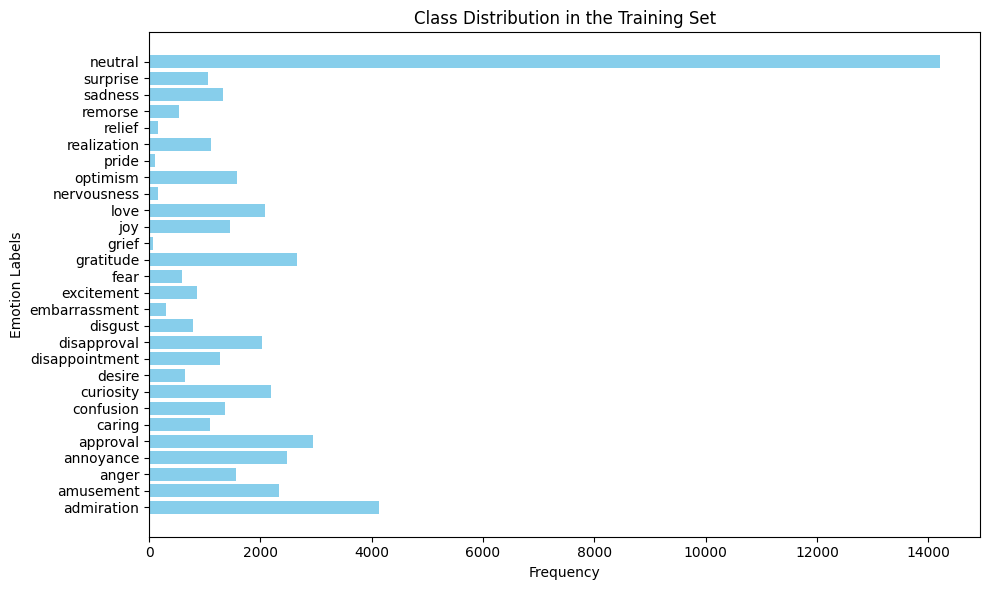

In [ ]:
train_labels = dataset["train"]["labels"]
class_counts = np.zeros(num_classes)

for sample_labels in train_labels:
    for label in sample_labels:
        class_counts[label] += 1

plt.figure(figsize=(10, 6))
plt.barh(label_names, class_counts, color="skyblue")
plt.xlabel("Frequency")
plt.ylabel("Emotion Labels")
plt.title("Class Distribution in the Training Set")
plt.tight_layout()
plt.show()

### Example Text Samples and Labels

Table 2. Example Text Samples with Emotion Labels

Description: A table showcasing a few text samples along with their corresponding emotion labels to highlight

In [ ]:
def get_examples_per_category(dataset, label_names, split="train"):
    examples = []
    seen_labels = set()

    for sample in dataset[split]:
        text = sample["text"]
        labels = sample["labels"]
        for label in labels:
            if label not in seen_labels:
                decoded_label = label_names[label]
                examples.append({"Category": decoded_label, "Text": text})
                seen_labels.add(label)
                if len(seen_labels) == len(label_names):
                    return examples
    return examples

def tabulate_examples(examples):
    table = [["Category", "Example Text"]]
    for example in examples:
        table.append([example["Category"], example["Text"]])
    print(tabulate(table, headers="firstrow", tablefmt="grid"))

examples = get_examples_per_category(dataset, label_names, split="train")
tabulate_examples(examples)

+----------------+-------------------------------------------------------------------------------------------------------------------------------+
| Category       | Example Text                                                                                                                  |
+================+===============================================================================================================================+
| neutral        | My favourite food is anything I didn't have to cook myself.                                                                   |
+----------------+-------------------------------------------------------------------------------------------------------------------------------+
| anger          | WHY THE FUCK IS BAYLESS ISOING                                                                                                |
+----------------+----------------------------------------------------------------------------------------------------

### Highlighting Overlapping Labels

Table 3. Top Overlapping Emotion Label Pairs

Description: A table presenting the most frequently co-occuring emotion labels to emphasize the complexity of distinguishing between similar emotions.



In [ ]:
def compute_and_display_overlapping_pairs(train_labels, label_names, top_n=10):
    pair_counts = Counter()

    for sample_labels in train_labels:
        for i in range(len(sample_labels)):
            for j in range(i + 1, len(sample_labels)):
                pair_counts[(sample_labels[i], sample_labels[j])] += 1

    overlapping_pairs = sorted(pair_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]

    table = [["Label 1", "Label 2", "Count"]]
    for (label1, label2), count in overlapping_pairs:
        table.append([label_names[label1], label_names[label2], count])

    print(tabulate(table, headers="firstrow", tablefmt="grid"))

compute_and_display_overlapping_pairs(train_labels, label_names)

+----------------+-------------+---------+
| Label 1        | Label 2     |   Count |
+================+=============+=========+
| admiration     | gratitude   |     279 |
+----------------+-------------+---------+
| anger          | annoyance   |     269 |
+----------------+-------------+---------+
| admiration     | approval    |     246 |
+----------------+-------------+---------+
| confusion      | curiosity   |     212 |
+----------------+-------------+---------+
| approval       | neutral     |     202 |
+----------------+-------------+---------+
| admiration     | love        |     192 |
+----------------+-------------+---------+
| annoyance      | disapproval |     178 |
+----------------+-------------+---------+
| disappointment | sadness     |     133 |
+----------------+-------------+---------+
| annoyance      | neutral     |     132 |
+----------------+-------------+---------+
| admiration     | joy         |     126 |
+----------------+-------------+---------+


### Tokenization and Preprocessing Analysis

Figure 2. Token Length Distribution in the Training Set

Description: A histogram illustrating the distribution of tokenized text lengths, demonstrating the need for truncation and padding during preprocessing.

In [ ]:
def calculate_multilabel_distribution(dataset_split):
    """Calculate the distribution of samples by number of labels."""
    label_counts = []
    
    for sample in dataset_split:
        num_labels = len(sample["labels"])
        label_counts.append(num_labels)
    
    # Count occurrences
    from collections import Counter
    count_distribution = Counter(label_counts)
    total_samples = len(label_counts)
    
    # Calculate aggregated statistics
    one_label = count_distribution.get(1, 0)
    two_labels = count_distribution.get(2, 0)
    three_plus_labels = sum(count for k, count in count_distribution.items() if k >= 3)
    
    return {
        'total_samples': total_samples,
        'one_label_count': one_label,
        'two_labels_count': two_labels,
        'three_plus_labels_count': three_plus_labels,
        'one_label_pct': (one_label / total_samples) * 100,
        'two_labels_pct': (two_labels / total_samples) * 100,
        'three_plus_labels_pct': (three_plus_labels / total_samples) * 100,
        'detailed_distribution': dict(sorted(count_distribution.items()))
    }

# Calculate for all splits
splits = ['train', 'validation', 'test']
multilabel_results = {}

for split_name in splits:
    stats = calculate_multilabel_distribution(dataset[split_name])
    multilabel_results[split_name] = stats

# Create summary table
summary_data = []
for split_name in splits:
    stats = multilabel_results[split_name]
    summary_data.append({
        'Split': split_name.capitalize(),
        '1 Label': stats['one_label_count'],
        '1 Label (%)': f"{stats['one_label_pct']:.1f}",
        '2 Labels': stats['two_labels_count'],
        '2 Labels (%)': f"{stats['two_labels_pct']:.1f}",
        '3+ Labels': stats['three_plus_labels_count'],
        '3+ Labels (%)': f"{stats['three_plus_labels_pct']:.1f}",
        'Total': stats['total_samples']
    })

multilabel_df = pd.DataFrame(summary_data)

print("\nMulti-Label Distribution:")
print(tabulate(multilabel_df, headers="keys", tablefmt="grid", showindex=False))

# Export to CSV
multilabel_df.to_csv('multi_label_stats.csv', index=False)
print("\nStatistics exported to: multi_label_stats.csv")

# Print key finding
train_stats = multilabel_results['train']
total_multi_label_pct = train_stats['two_labels_pct'] + train_stats['three_plus_labels_pct']
print(f"\nKey Finding: {total_multi_label_pct:.1f}% of training samples contain multiple emotions")
print(f"  ({train_stats['two_labels_pct']:.1f}% have exactly 2 labels, {train_stats['three_plus_labels_pct']:.1f}% have 3+ labels)")